<a href="https://colab.research.google.com/github/saniyashk1542/ML_25-26/blob/main/04_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix
from tensorflow.keras.datasets import mnist
import random

In [7]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [8]:
print("Training set shape:",x_train.shape)

Training set shape: (60000, 28, 28)


In [9]:
print("Test set shape:",y_train.shape)

Test set shape: (60000,)


In [12]:
len(x_train)

60000

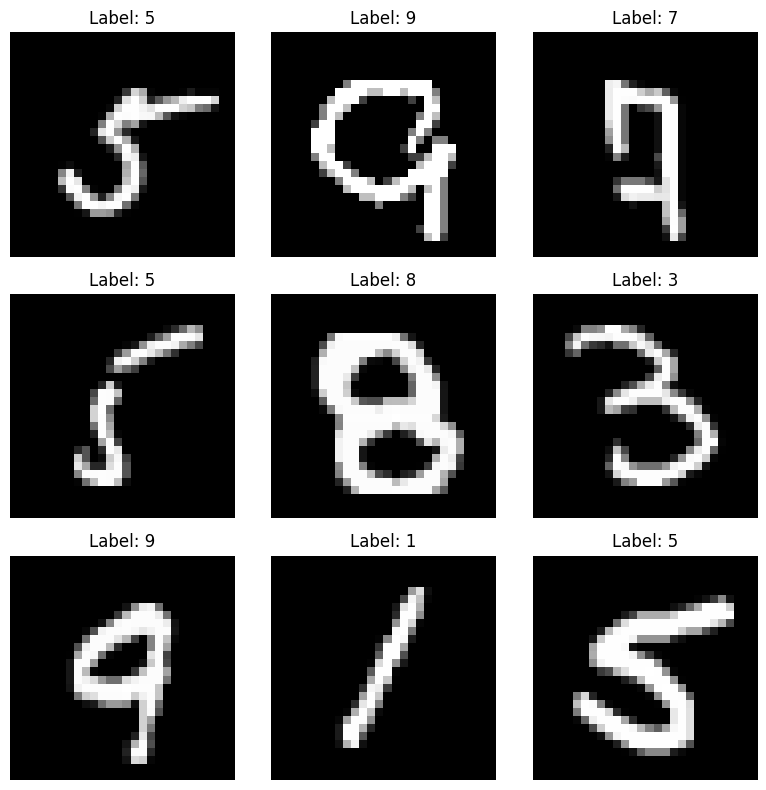

In [17]:
plt.figure(figsize=(8,8))
for i in range(9):
    index = random.randint(0, len(x_train))
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[index], cmap='gray')
    plt.title(f"Label: {y_train[index]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [18]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [21]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
x_test.shape[0]

10000

In [22]:
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)

print("After flattening:")
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

After flattening:
x_train shape: (60000, 784)
x_test shape: (10000, 784)


In [23]:
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [25]:
y_pred = model.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print(f"\n Accuracy: {acc*100:.2f}%")

cm = confusion_matrix(y_test, y_pred)


 Accuracy: 92.59%


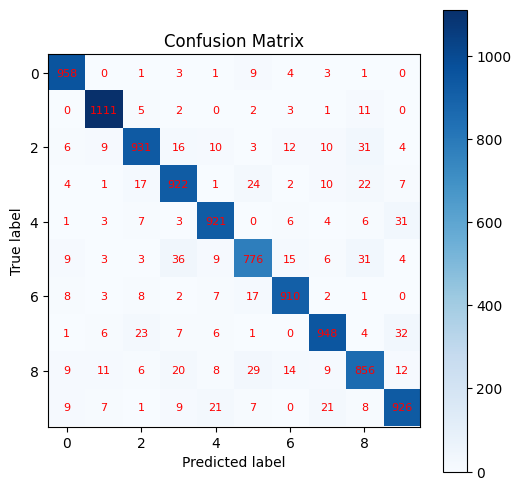

In [30]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.colorbar()

# Show numbers inside squares
for i in range(10):
    for j in range(10):
        plt.text(j, i, str(cm[i,j]), ha='center', va='center', color='red', fontsize=8)
plt.show()


Total misclassified samples: 741


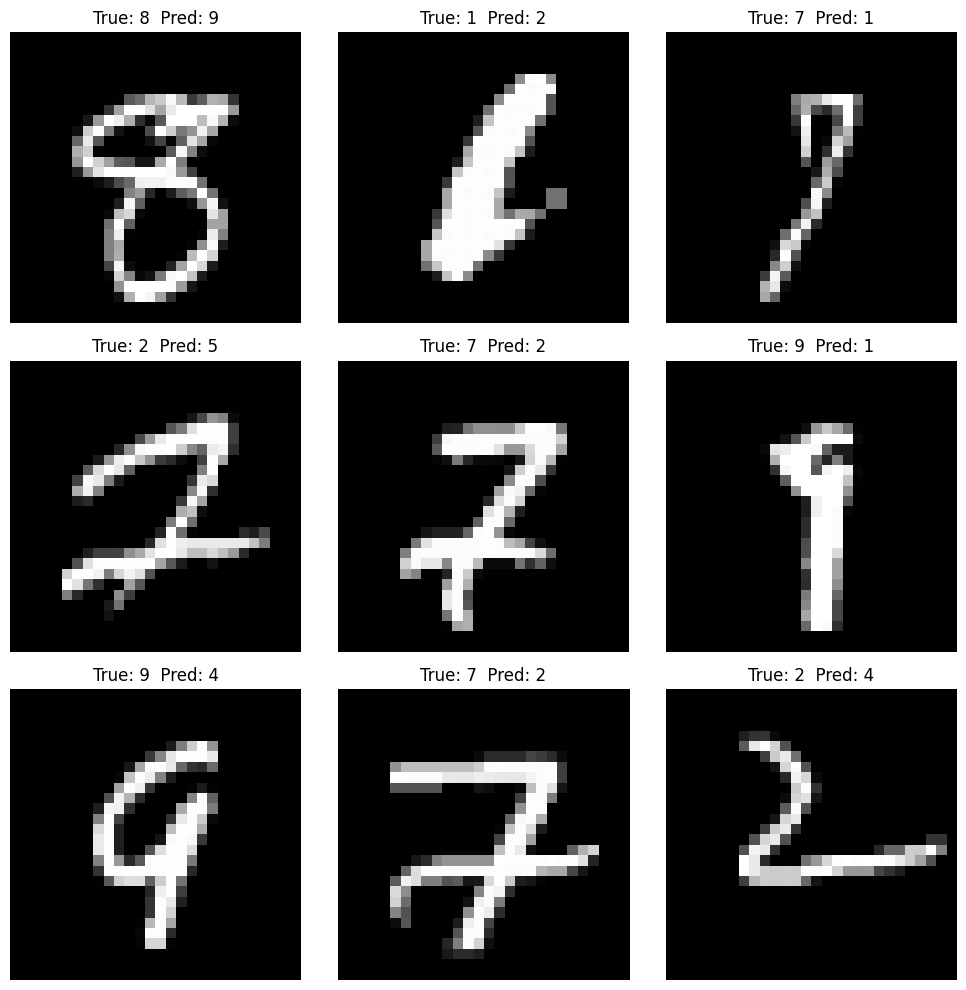

In [31]:
misclassified = np.where(y_test != y_pred)[0]
print("Total misclassified samples:", len(misclassified))

plt.figure(figsize=(10,10))
for i in range(9):
    index = random.choice(misclassified)
    image = x_test[index].reshape(28,28)  # reshape back to image
    plt.subplot(3,3,i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {y_test[index]}  Pred: {y_pred[index]}")
    plt.axis('off')
plt.tight_layout()
plt.show()